In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
dataset = pd.read_csv('../EDA/numData.csv')
Y = pd.read_csv('../EDA/y.csv')

In [22]:
X_without = dataset.drop(columns=["year","country"], axis=0)

In [5]:
X_without = X_without.fillna(0)
X_without = X_without.replace(np.inf, 0)

In [6]:
bigNumbers = X_without.max()[X_without.max() > 10000000].keys()
for bigColumn in bigNumbers:
    X_without[bigColumn+"log"] = np.log10(X_without[bigColumn])

# X_without = X_without.drop(columns=bigNumbers, axis=0)

c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Thoma\.conda\envs\thesisProject\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
X_without = X_without.replace(np.inf, 0)
X_without = X_without.replace(-np.inf, 0)
X_without = X_without.fillna(0)

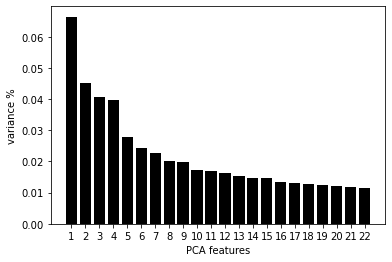

<Figure size 1440x144 with 0 Axes>

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = StandardScaler().fit_transform(X_without)

pca = PCA()
principalComponents = pca.fit_transform(X)

features = range(1,23)
plt.bar(features, pca.explained_variance_ratio_[:22], color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.figure(figsize=(20, 2))

PCA_components = pd.DataFrame(principalComponents)

In [13]:
np.sum(pca.explained_variance_ratio_[:8])

0.2870356474104815

In [14]:
from sklearn.manifold import TSNE
tSNE = TSNE(n_components=3)
tSNE_COMPS = tSNE.fit_transform(PCA_components)

tSNE_PCA_components = pd.DataFrame(tSNE_COMPS)

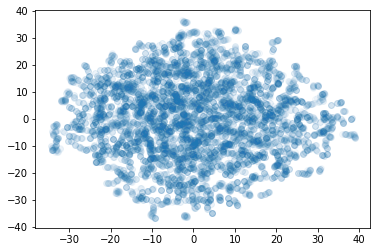

In [15]:
plt.scatter(tSNE_PCA_components[0], tSNE_PCA_components[1], alpha=.04)
plt.show()

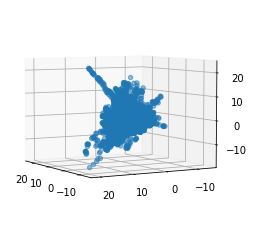

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(PCA_components[0], PCA_components[2], PCA_components[3], alpha=.5)
ax.view_init(elev=5., azim=150)

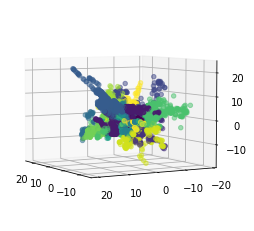

In [23]:
from sklearn import mixture
from mpl_toolkits.mplot3d import Axes3D

components = 15
features = 11

gmm = mixture.GaussianMixture(n_components=components, covariance_type='full')
labels = gmm.fit_predict(PCA_components.iloc[:,:features])

X_without["gmmLabels-"+str(components)+str(features)] = labels
dataset["gmmLabels-"+str(components)+str(features)] = labels

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(PCA_components[0], PCA_components[1], PCA_components[3], c=labels, alpha=.5)
ax.view_init(elev=5., azim=150)

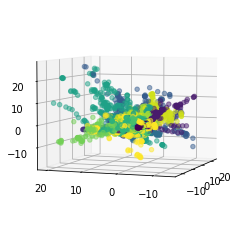

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(PCA_components[0], PCA_components[2], PCA_components[4], c=labels, alpha=.5)
ax.view_init(elev=5., azim=200)

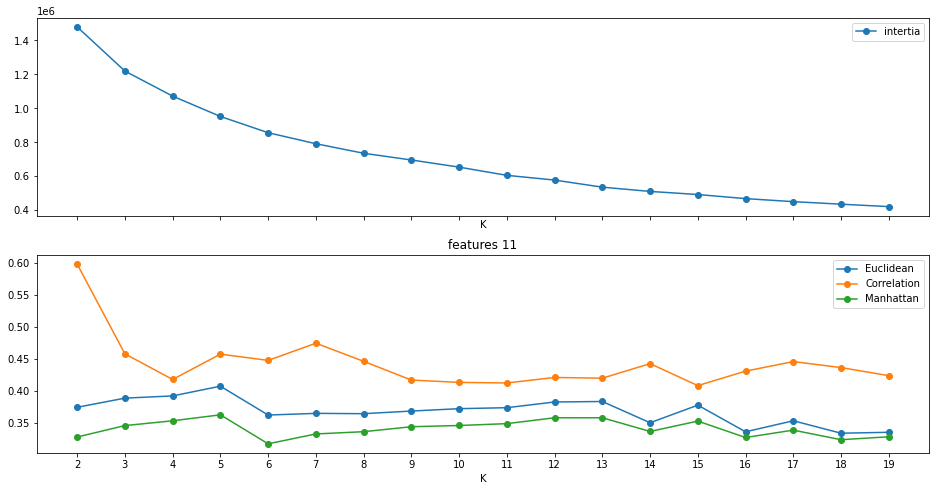

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn.metrics import  silhouette_score

k_cand = list(np.arange(2,20,1))
features = 11
results = dict()

for k in k_cand:

    kmeans = KMeans( n_clusters=k)
    labels = kmeans.fit_predict(PCA_components.iloc[:,:features])
    score0 = kmeans.inertia_
    score1 = silhouette_score(PCA_components.iloc[:,:features],labels,metric='euclidean')
    score2 = silhouette_score(PCA_components.iloc[:,:features],labels,metric='correlation')
    score3 = silhouette_score(PCA_components.iloc[:,:features],labels,metric='manhattan')
    results[k] = {'k':kmeans,'s0':score0,'s1':score1,'s2':score2,'s3':score3}

fig,axs = plt.subplots(2,1,sharex=True,figsize=(16,8))
plt.title('features '+ str(features))
axs[0].plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='intertia')
axs[1].plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Euclidean')
axs[1].plot([i for i in results.keys()],[i['s2'] for i in results.values()],'o-',label='Correlation')
axs[1].plot([i for i in results.keys()],[i['s3'] for i in results.values()],'o-',label='Manhattan')
for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('K')
    ax.legend()

plt.savefig("features-minmax-scale"+str(features)+".png") 
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.32958254204567333
For n_clusters = 3 The average silhouette_score is : 0.18472611388578233
For n_clusters = 4 The average silhouette_score is : 0.17491356424402005
For n_clusters = 5 The average silhouette_score is : 0.2392007736131939
For n_clusters = 6 The average silhouette_score is : 0.07972343006818952
For n_clusters = 7 The average silhouette_score is : 0.09778381962251952
For n_clusters = 8 The average silhouette_score is : 0.18766562084966107
For n_clusters = 9 The average silhouette_score is : 0.0965233680367954


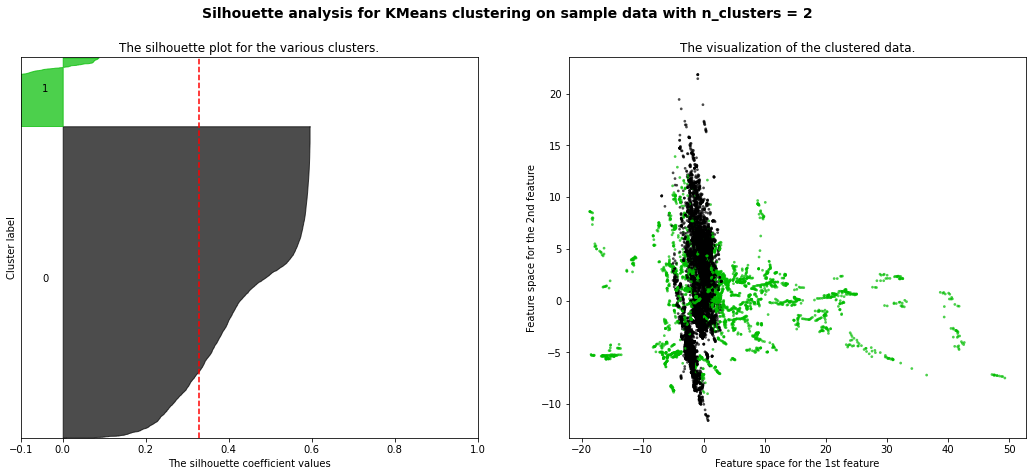

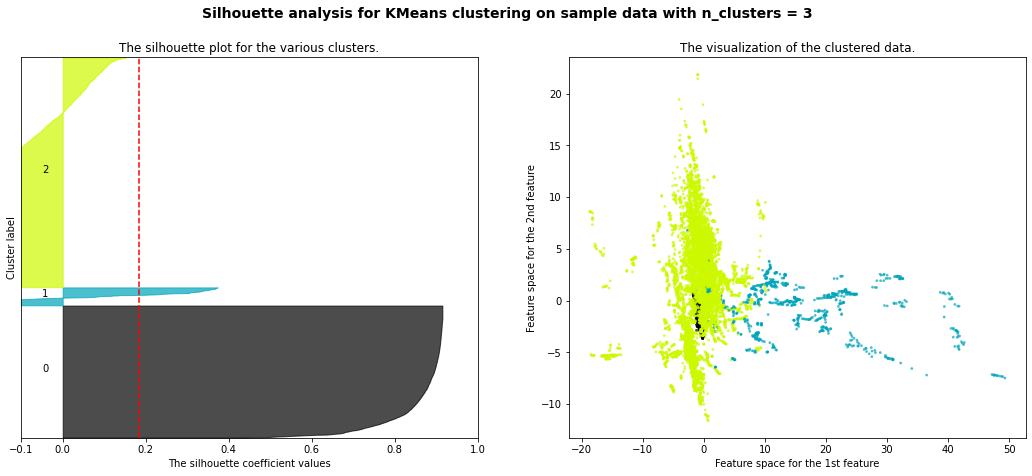

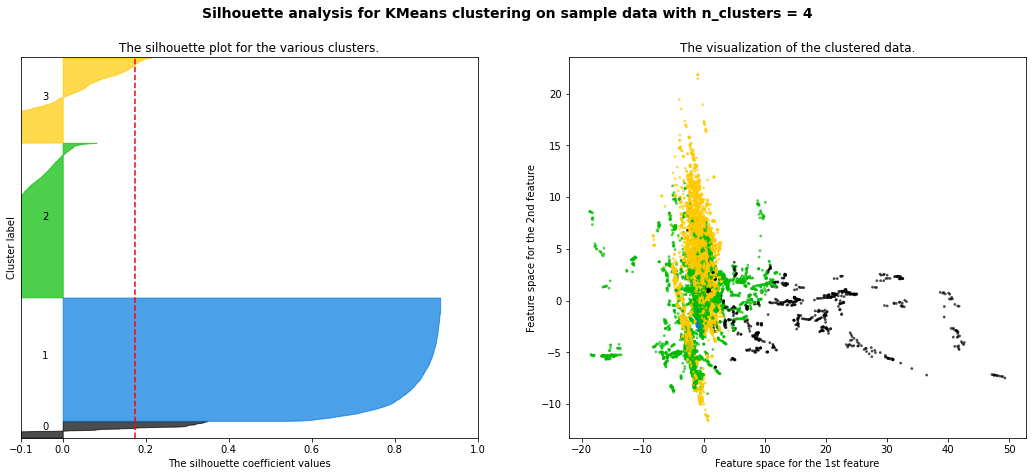

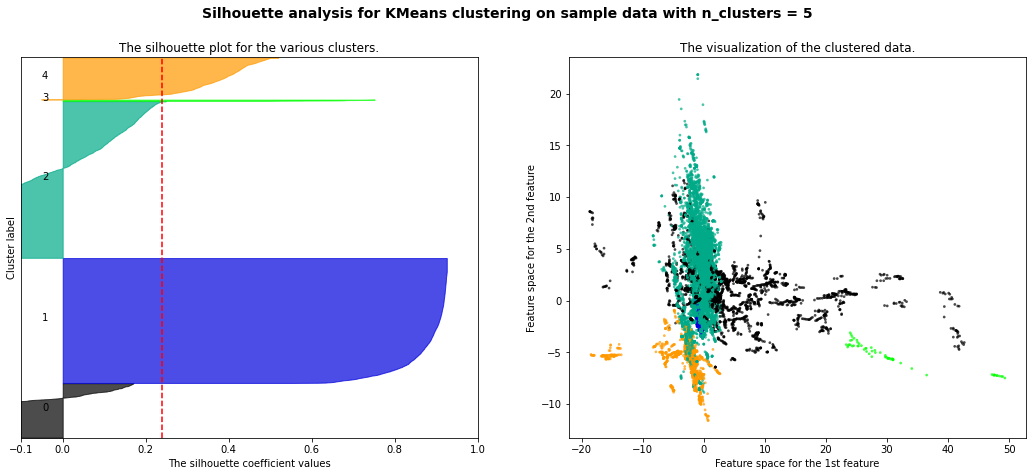

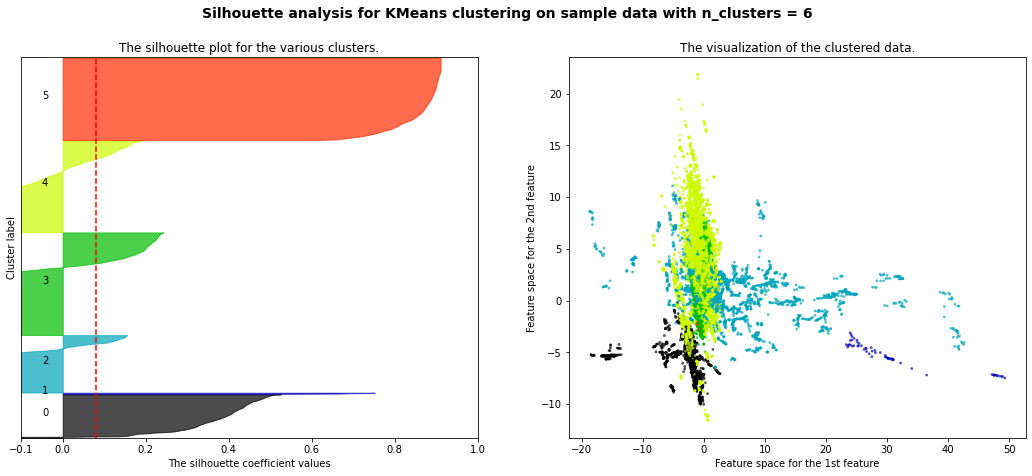

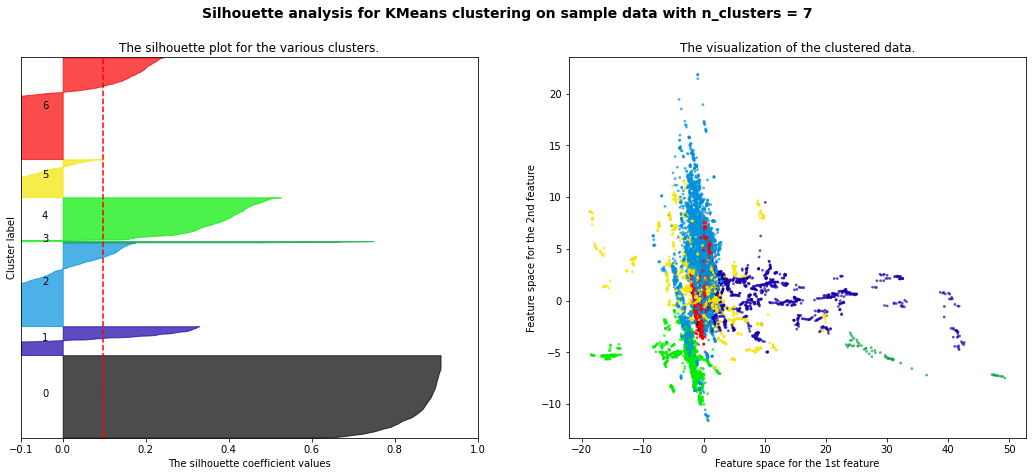

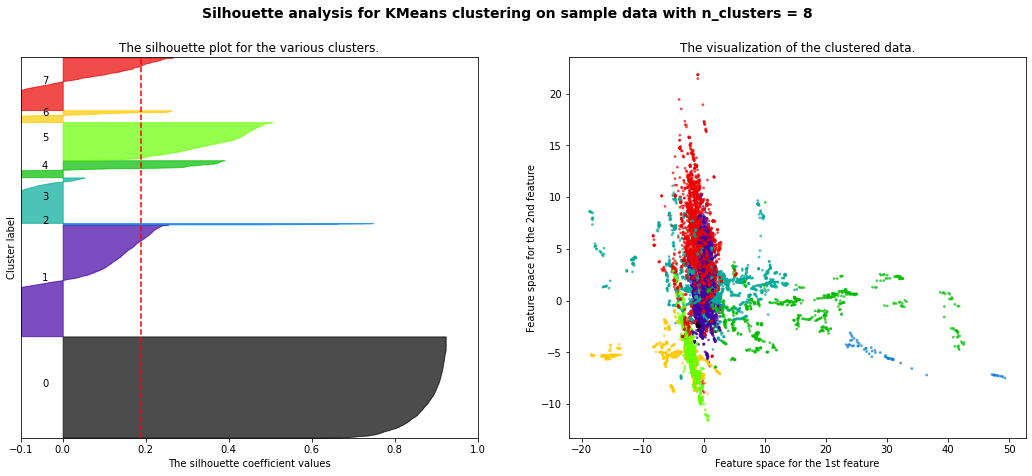

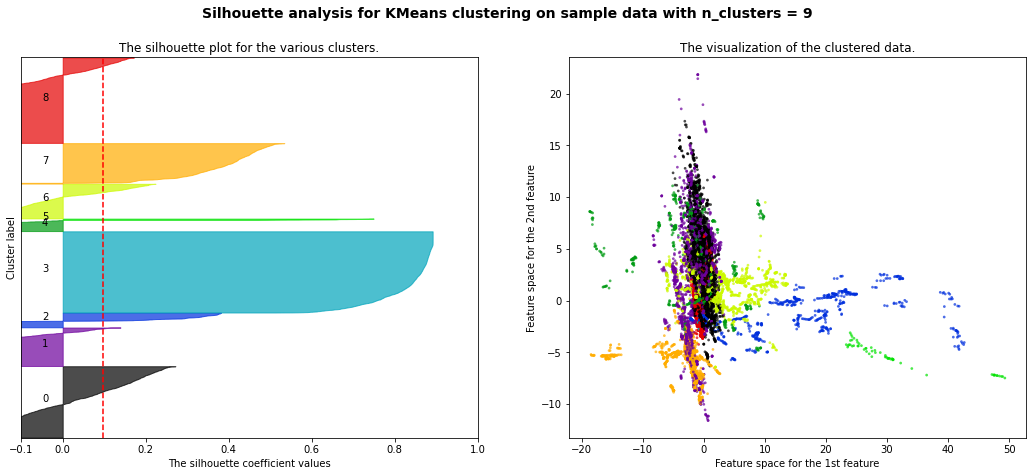

In [94]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import mixture
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

features = 6
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(PCA_components.iloc[:,:features]) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = mixture.GaussianMixture(n_components=n_clusters)
    cluster_labels = clusterer.fit_predict(PCA_components.iloc[:,:features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(PCA_components.iloc[:,:features], cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(PCA_components.iloc[:,:features], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        PCA_components.iloc[:, 0], PCA_components.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # # Labeling the clusters
    # centers = clusterer.cluster_centers_
    # # Draw white circles at cluster centers
    # ax2.scatter(
    #     centers[:, 0],
    #     centers[:, 1],
    #     marker="o",
    #     c="white",
    #     alpha=1,
    #     s=200,
    #     edgecolor="k",
    # )

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [29]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import mixture


for features in range(1,20):
    lowest_bic = np.infty
    bic = []
    n_components_range = list(np.arange(1, 20,1))
    n_components_range.extend(list(np.arange(50,500,50)))
    cv_types = ["spherical", "tied", "diag", "full"]
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(
                n_components=n_components, covariance_type=cv_type
            )
            gmm.fit(PCA_components.iloc[:,:features])
            bic.append(gmm.bic(PCA_components.iloc[:,:features]))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm

    bic = np.array(bic)
    color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    plt.figure(figsize=(20, 4))
    spl = plt.subplot(1, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + 0.2 * (i - 2)
        bars.append(
            plt.bar(
                xpos,
                bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
                width=0.2,
                color=color,
            )
        )
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
    plt.title("BIC score per model " +str(features))
    xpos = (
        np.mod(bic.argmin(), len(n_components_range))
        + 0.65
        + 0.2 * np.floor(bic.argmin() / len(n_components_range))
    )
    plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
    spl.set_xlabel("Number of components")
    spl.legend([b[0] for b in bars], cv_types)
    plt.show()

KeyboardInterrupt: 

In [28]:
dataset = dataset.merge(Y, how='left', on=["year","country"])
dataset.to_csv("Finalcluster.csv")

In [25]:
checkingMatrix = dataset.iloc[:,-10:]

In [26]:
checkingMatrix

,gmmLabels-1511,democ,autoc,polity,polity2,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem
0,0,0.0,1.0,0.0,0.0,0.081000,0.068000,0.028000,0.061000,0.066
1,0,0.6,0.1,1.5,1.5,0.482667,0.337667,0.310333,0.427667,0.367
2,9,1.0,0.0,2.0,2.0,0.824000,0.766000,0.582000,0.727000,0.666
3,14,1.0,0.0,2.0,2.0,0.836000,0.693000,0.592000,0.608000,0.725
4,0,NaN,NaN,NaN,NaN,0.108000,0.060000,0.066000,0.025000,0.052
...,...,...,...,...,...,...,...,...,...,...
14134,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14135,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14136,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14137,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import scipy.stats as scStat

setToCompare = "gmmLabels-84"
clusters = len(checkingMatrix[setToCompare].unique())
democracyScore = "v2x_libdem"

clusters = len(checkingMatrix[setToCompare].unique())

bars = [np.mean(checkingMatrix[checkingMatrix[setToCompare]==i][democracyScore].dropna().values) for i in range(clusters)]
plt.bar(range(clusters),bars)
plt.xticks(range(clusters))
plt.show()


# zeroArray = np.zeros((clusters+1,clusters+1))
zeroArray = [[0]*(clusters+1)]*(clusters+1)

barlett = [checkingMatrix[checkingMatrix[setToCompare]==i][democracyScore].dropna().values for i in range(clusters)]
barlettTest = scStat.levene(*barlett)

print(barlettTest)

for i in range(clusters):
    # print(len(checkingMatrix[checkingMatrix[setToCompare]==i]["v2x_partipdem"]))
    compareSet = checkingMatrix[checkingMatrix[setToCompare]==i][democracyScore].dropna().values
    if len(compareSet) > 8:
        normality_v2X_PartiDem = scStat.normaltest(compareSet)
        print(normality_v2X_PartiDem, barlettTest)
        for z in range(clusters):
            tTest = 0
            if i != z:
                compareSet2 = checkingMatrix[checkingMatrix[setToCompare]==z][democracyScore].dropna().values
                levene = scStat.levene(compareSet,compareSet2)
                print(levene)

                if len(compareSet2) > 8:
                    tTest = scStat.ttest_ind(compareSet,compareSet2)
                    zeroArray[i][z] = (tTest[1], levene[1])
                    print("Compare "+ democracyScore +", of cluster", i, " against:", z, ":", tTest)
                    print("")
            else:
                zeroArray[i][z] = 1
    print("")

zeroArray